In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Importing Modules**

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
import re

# **Load the Dataset**

In [3]:
Crema_Path='/kaggle/input/speech-emotion-recognition-en/Crema/'
#Ravdess_Path='/kaggle/input/speech-emotion-recognition-en/Ravdess/audio_speech_actors_01-24/'
Savee_Path='/kaggle/input/speech-emotion-recognition-en/Savee/'
Tess_Path='/kaggle/input/speech-emotion-recognition-en/Tess/'

In [4]:
paths=[]
labels=[]
for wav in os.listdir(Crema_Path):
    emotion=wav.partition(".wav")[0].split('_')
    #label=wav.split('_')[2]
    #print(label)
    if emotion[2]=='SAD':
        paths.append((Crema_Path+wav))
        labels.append('sad')
    elif emotion[2]=='ANG':
        paths.append((Crema_Path+wav))
        labels.append('angry')
    elif emotion[2]=='DIS':
        paths.append((Crema_Path+wav))
        labels.append('disgust')
    elif emotion[2]=='FEA':
        paths.append((Crema_Path+wav))
        labels.append('fear')
    elif emotion[2]=='HAP':
        paths.append((Crema_Path+wav))
        labels.append('happy')
    elif emotion[2]=='NEU':
        paths.append((Crema_Path+wav))
        labels.append('neutral')
    else:
        paths.append((Crema_Path+wav))
        labels.append('unknown')
paths[:5]

['/kaggle/input/speech-emotion-recognition-en/Crema/1028_TSI_DIS_XX.wav',
 '/kaggle/input/speech-emotion-recognition-en/Crema/1075_IEO_HAP_LO.wav',
 '/kaggle/input/speech-emotion-recognition-en/Crema/1084_ITS_HAP_XX.wav',
 '/kaggle/input/speech-emotion-recognition-en/Crema/1067_IWW_DIS_XX.wav',
 '/kaggle/input/speech-emotion-recognition-en/Crema/1066_TIE_DIS_XX.wav']

In [5]:
for wav in os.listdir(Savee_Path):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        paths.append((Savee_Path+wav))
        labels.append('angry')
    elif emotion=='d':
        paths.append((Savee_Path+wav))
        labels.append('disgust')
    elif emotion=='f':
        paths.append((Savee_Path+wav))
        labels.append('fear')
    elif emotion=='h':
        paths.append((Savee_Path+wav))
        labels.append('happy')
    elif emotion=='n':
        paths.append((Savee_Path+wav))
        labels.append('neutral')
    elif emotion=='sa':
        paths.append((Savee_Path+wav))
        labels.append('sad')
    elif emotion=='su':
        paths.append((Savee_Path+wav))
        labels.append('surprise')
paths[-5:]
labels[-5:]

['surprise', 'neutral', 'neutral', 'angry', 'happy']

In [6]:
for directory in os.listdir(Tess_Path):
    for wav in os.listdir(os.path.join(Tess_Path,directory)):
        emotion=wav.partition('.wav')[0].split('_')
        if emotion[2]=='ps':
            paths.append((os.path.join(Tess_Path,directory,wav)))
            labels.append('surprise')
        else:
            paths.append((os.path.join(Tess_Path,directory,wav)))
            label = wav.split('_')[-1]
            label = label.split('.')[0]
            labels.append(label.lower())
#paths[-2000:]
labels[-5:]

['surprise', 'surprise', 'surprise', 'surprise', 'surprise']

# **Creating a DataFrame**

In [7]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/speech-emotion-recognition-en/Cr...,disgust
1,/kaggle/input/speech-emotion-recognition-en/Cr...,happy
2,/kaggle/input/speech-emotion-recognition-en/Cr...,happy
3,/kaggle/input/speech-emotion-recognition-en/Cr...,disgust
4,/kaggle/input/speech-emotion-recognition-en/Cr...,disgust


In [8]:
df['label'].value_counts()

label
disgust     1731
happy       1731
sad         1731
fear        1731
angry       1731
neutral     1607
surprise     460
Name: count, dtype: int64

# **Exploratory Data Analysis**

In [9]:
sns.countplot(df['label'])

ValueError: could not convert string to float: 'disgust'

In [10]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
     x = librosa.stft(data)
     xdb = librosa.amplitude_to_db(abs(x))
     plt.figure(figsize=(11,4))
     plt.title(emotion, size=20)
     librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
     plt.colorbar()

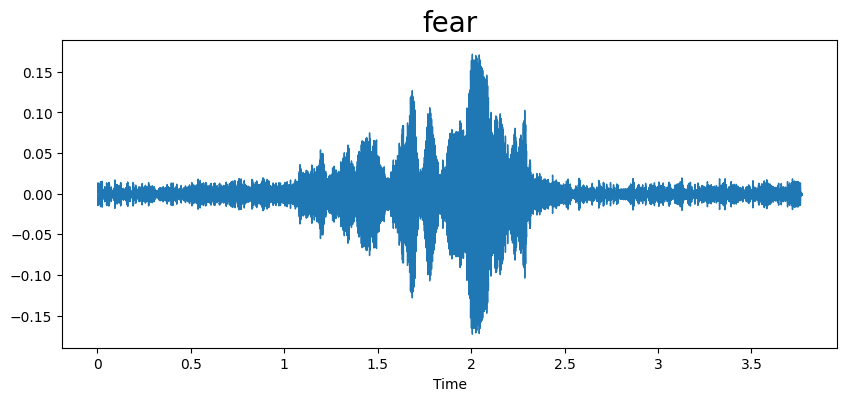

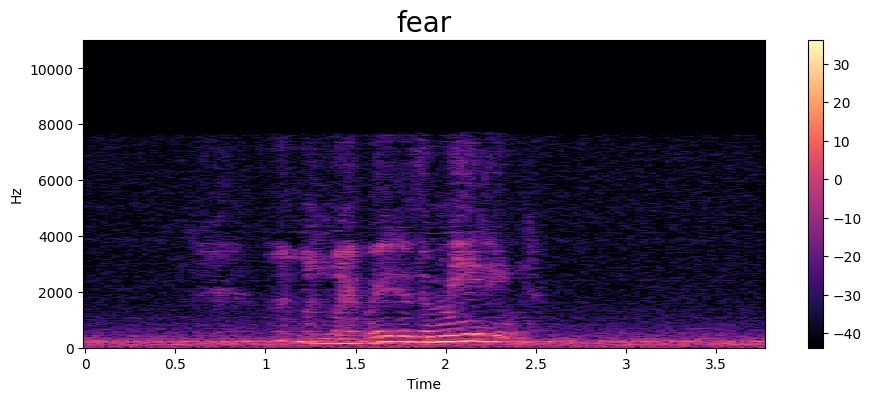

In [11]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

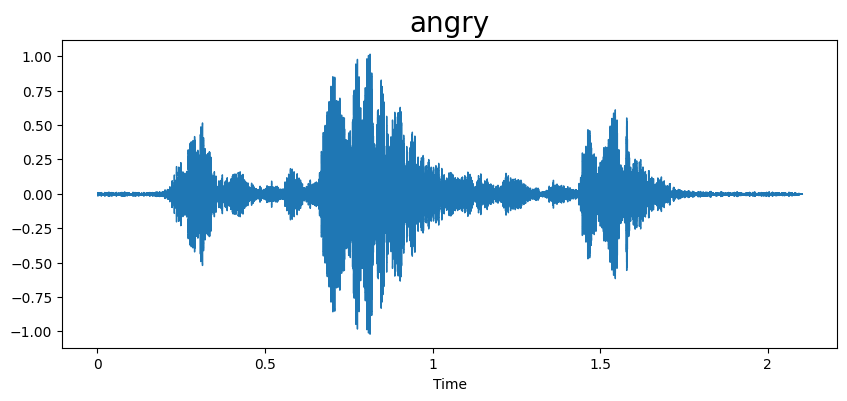

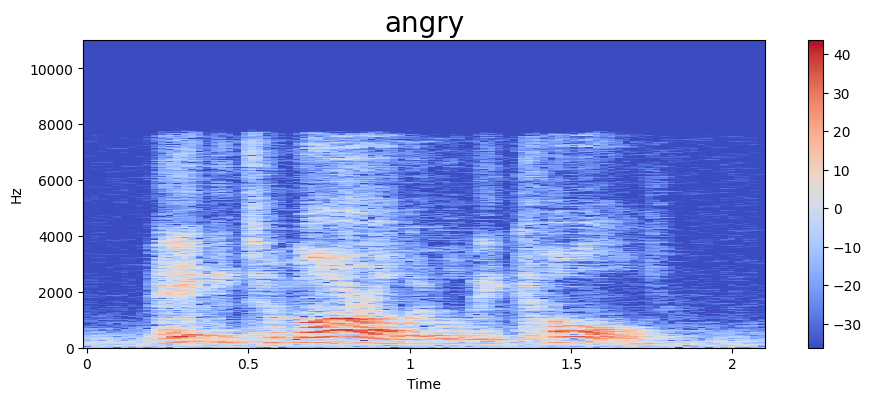

In [28]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

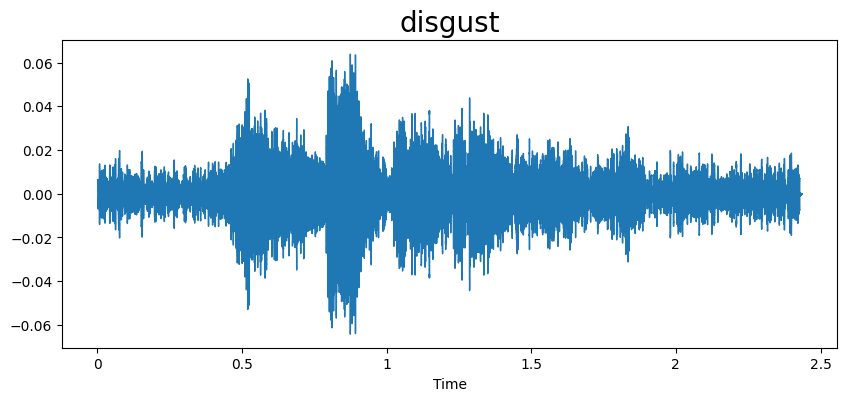

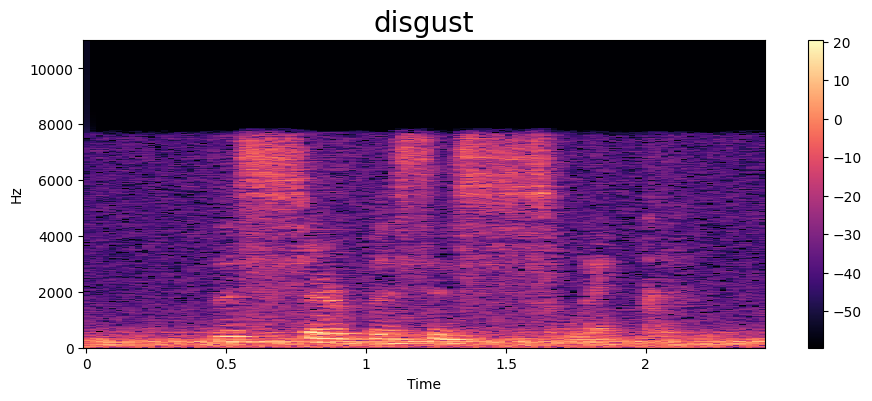

In [29]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

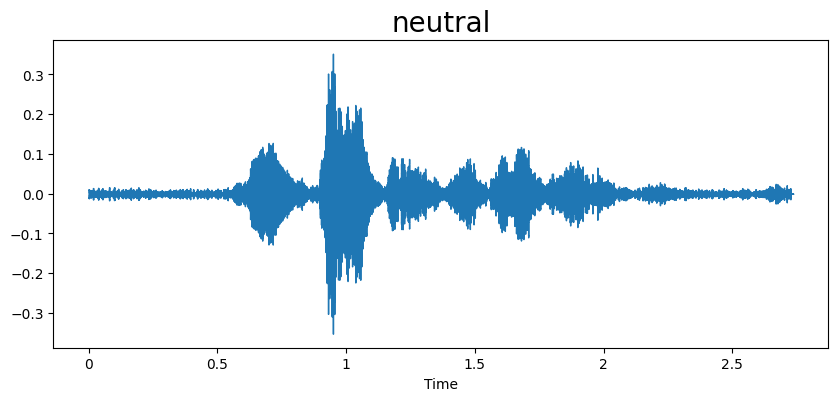

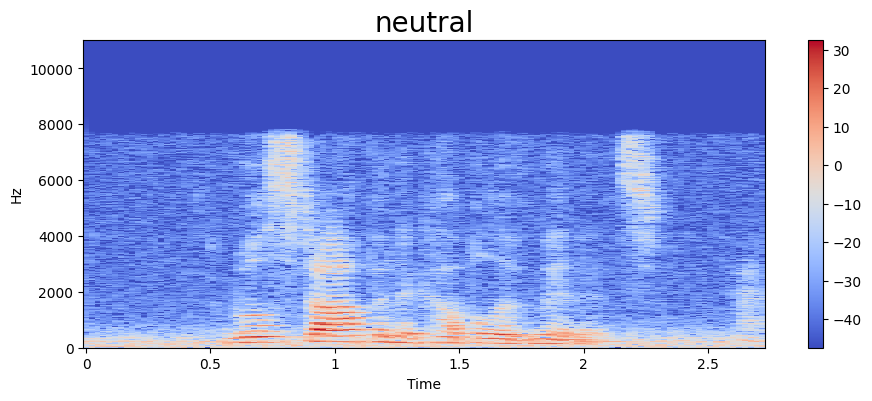

In [30]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

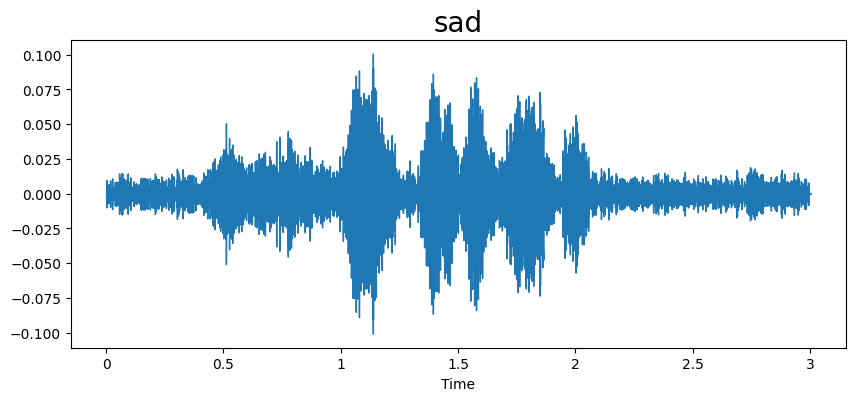

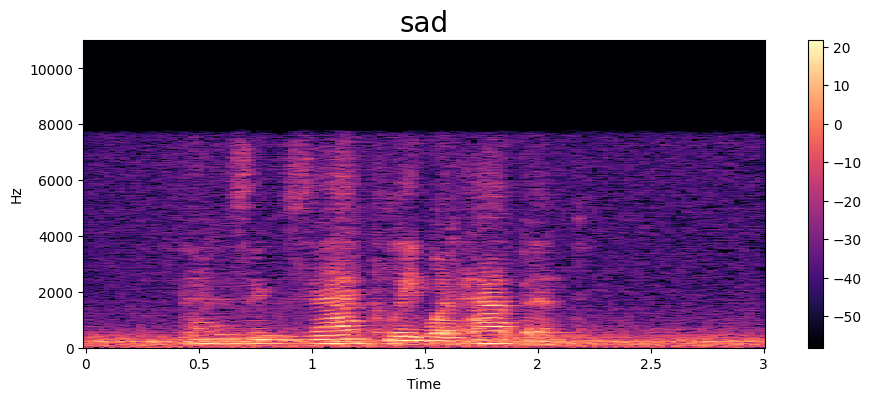

In [31]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

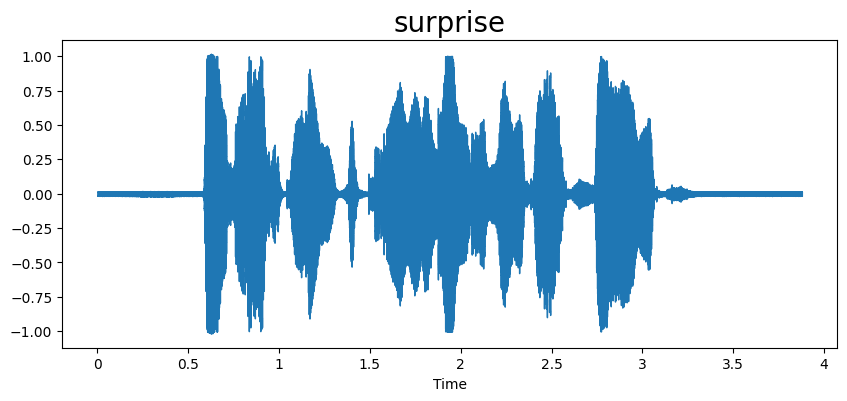

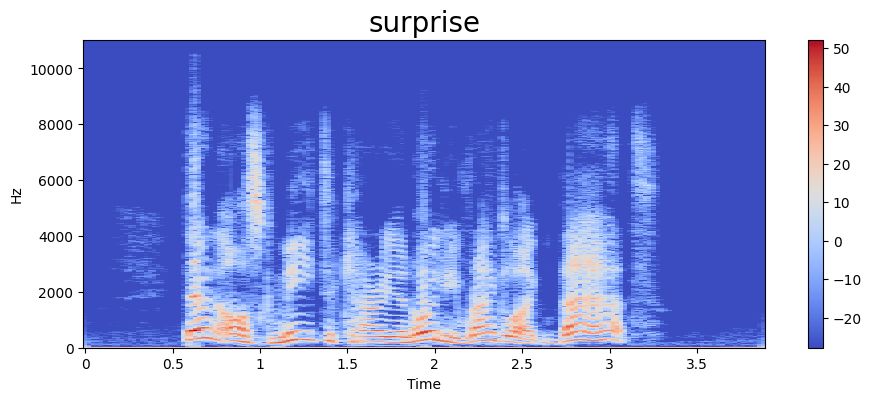

In [32]:
emotion = 'surprise'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


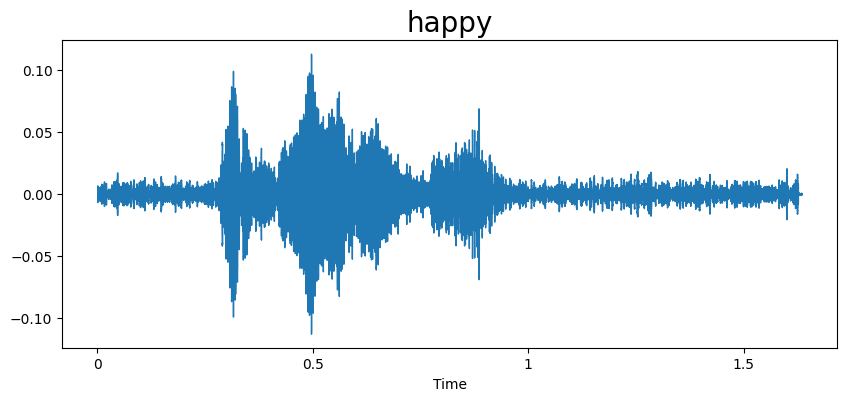

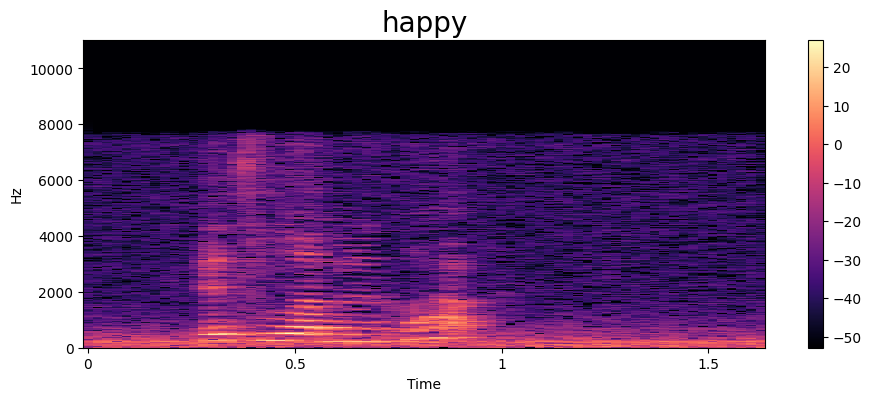

In [33]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# **Feature Extraction**

In [12]:
def extract_mfcc(filename):
     y, sr = librosa.load(filename, duration=3, offset=0.5)
     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
     return mfcc

In [13]:
extract_mfcc(df['speech'][0])

array([-4.13752197e+02,  1.27548805e+02,  6.44320011e+00,  7.52351227e+01,
       -1.80421505e+01,  4.29257393e+01, -3.41933289e+01,  1.64774952e+01,
       -1.86584816e+01,  6.84796381e+00, -1.64492834e+00, -9.47653103e+00,
        9.61474133e+00, -9.45434284e+00,  5.51908875e+00, -1.59697437e+01,
        8.57718468e+00, -1.20153303e+01, -1.23891719e-01, -6.41870022e+00,
       -1.67593074e+00, -1.30907083e+00, -2.71159625e+00,  5.46584511e+00,
       -5.92133188e+00,  9.64601421e+00, -5.52050161e+00,  4.95320368e+00,
       -3.10493803e+00,  1.62867224e+00, -3.34937930e-01, -1.81799620e-01,
        5.05559301e+00, -1.30610675e-01,  3.72512007e+00, -2.28804135e+00,
        4.43102455e+00, -5.07971287e+00,  2.51153231e+00, -4.62381899e-01],
      dtype=float32)

In [14]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [15]:
X_mfcc

0        [-413.7522, 127.548805, 6.4432, 75.23512, -18....
1        [-431.05634, 145.30252, 9.3984995, 44.06137, -...
2        [-390.75104, 119.2987, 4.9241314, 52.241413, -...
3        [-362.1265, 126.22375, 26.561232, 44.52735, -6...
4        [-384.1598, 139.08711, 4.4927893, 46.741413, -...
                               ...                        
10717    [-374.39523, 60.865, 0.025058376, 8.431059, -2...
10718    [-313.9648, 39.847843, -5.6493053, -3.8675752,...
10719    [-357.54886, 77.88606, -15.224756, 2.1946328, ...
10720    [-353.14743, 101.68391, -14.175895, -12.037377...
10721    [-389.4595, 54.042767, 1.3469967, -1.4258995, ...
Name: speech, Length: 10722, dtype: object

In [16]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(10722, 40)

In [17]:
## input split
X = np.expand_dims(X, -1)
X.shape

(10722, 40, 1)

In [18]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y = y.toarray()
y.shape

(10722, 7)

# **Create the LSTM Model**

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=128)

Epoch 1/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8020 - loss: 0.7544 - val_accuracy: 0.2065 - val_loss: 9.4388
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9337 - loss: 0.1979 - val_accuracy: 0.2079 - val_loss: 12.8244
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9667 - loss: 0.1046 - val_accuracy: 0.2047 - val_loss: 13.9200
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9725 - loss: 0.0875 - val_accuracy: 0.2019 - val_loss: 14.4606
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9466 - loss: 0.1508 - val_accuracy: 0.2033 - val_loss: 13.0691
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9382 - loss: 0.1812 - val_accuracy: 0.1897 - val_loss: 13.6645
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8155 - loss: 0.6463 - val_accuracy: 0.2061 - val_loss: 10.9797
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9408 - loss: 0.1851 - val_accuracy: 0.1

# **Plot the results**

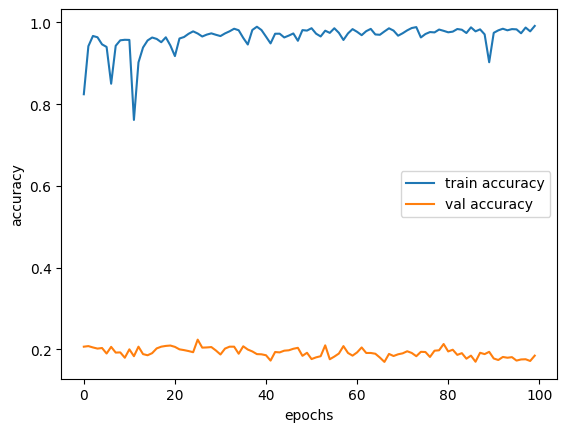

In [26]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

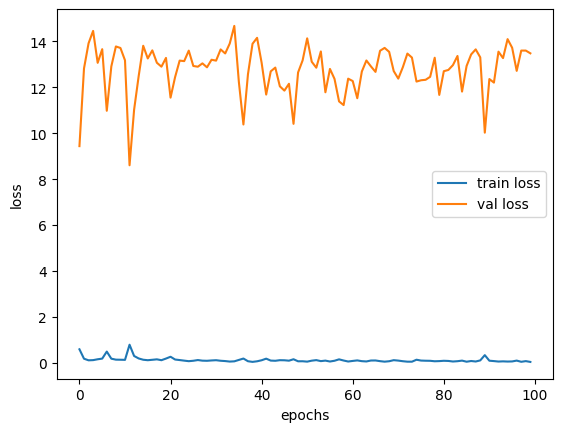

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()